# Probabilistic models for linear regression


Probabilistic models for linear regression provide a probabilistic framework for modeling the relationship between input variables (features) and a continuous target variable (response). Unlike traditional linear regression, which provides point estimates for model parameters, probabilistic linear regression models offer uncertainty estimates for both the parameters and the predictions. Two common probabilistic models for linear regression are Bayesian Linear Regression and Gaussian Process Regression.


1. <h4>Bayesian Linear Regression:</h4>

In Bayesian Linear Regression, we treat the model parameters (coefficients and intercept) as random variables and assign prior distributions to them. The choice of priors reflects our prior beliefs about the parameters before observing any data. Given the data, we compute the posterior distribution over the parameters using Bayes' theorem. 

The posterior distribution represents our updated beliefs about the parameters after considering the data. 
The posterior distribution provides us with a range of possible parameter values, which allows us to express uncertainty in the model. To make pedredictions, we sample from the posterior distribution of parameters to obtain a distribution over predictions, which captures prediction uncertain

<h6>Pros: </h6>

* Provides uncertainty estimates for model parameters and predictions;
* Can handle heteroscedasticity (varying noise levels across data points);
* Incorporates prior knowledge into the model.

<h6>Cons:</h6>

* Computationally more intensive due to sampling or numerical integration for posterior estimation.


2. <h4>Gaussian Process Regression (GP Regression):</h4>

Gaussian Process Regression is a non-parametric probabilistic model that models the entire function space over the input variables. Instead of estimating specific parameters, GP Regression defines a prior over functions. It assumes that function values at any set of input points are jointly Gaussian distributed.


Given observed data, GP Regression updates the posterior distribution over functions. This posterior distribution allows for point predictions as well as prediction uncertainty. GP Regression is particularly useful when you have limited data or when the underlying relationship between inputs and outputs is complex and non-linea


<h6>Pros: </h6>

* Provides flexible non-parametric modeling of functions;
* Captures uncertainty in predictions effectively;
* Naturally handles variable noise levels.

<h6>Cons:</h6>

* Computationally intensive for large datasets due to matrix operations;
* Requires the choice of a kernel function, which influences the model's flexibility.

Here's an example of Bayesian Linear Regression using Python with the BayesianRidge class from the scikit-learn library:

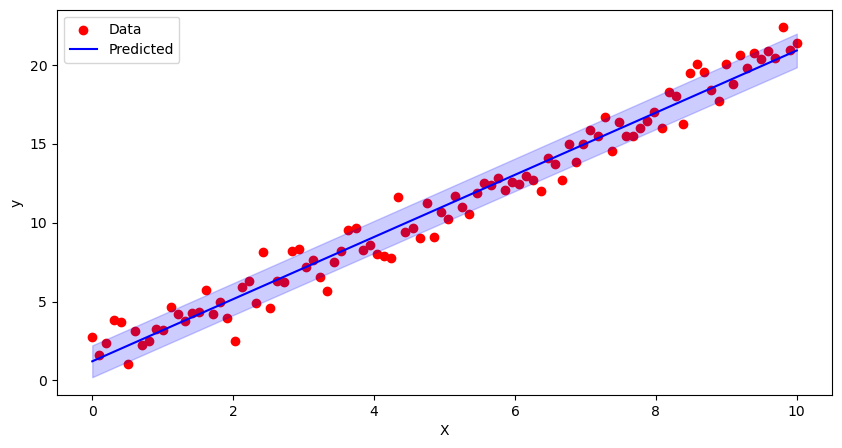

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge

# Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 10, 100)
true_slope = 2.0
true_intercept = 1.0
y = true_slope * X + true_intercept + np.random.normal(0, 1, 100)

# Create and fit a Bayesian Ridge Regression model
reg = BayesianRidge()
reg.fit(X[:, np.newaxis], y)

# Make predictions
X_pred = np.linspace(0, 10, 1000)[:, np.newaxis]
y_mean, y_std = reg.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X, y, c='r', label='Data')
plt.plot(X_pred, y_mean, 'b', label='Predicted')
plt.fill_between(X_pred[:, 0], y_mean - y_std, y_mean + y_std, alpha=0.2, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()